In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 48.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.33.2
    Uninstalling transformers-4.33.2:
      Successfully uninstalled transformers-4.33.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 44 texts from ECHR (automatic translations) with projected annotations (reviewed)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-projected-rev.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-09-20 12:15:14,341 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-09-20 12:15:14,343 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-reviewed-PER-rev.tsv
2023-09-20 12:15:14,345 Dev: None
2023-09-20 12:15:14,346 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1309,
        "number_of_documents_per_class": {
            "CODE": 45,
            "PER": 277,
            "DATETIME": 650,
            "LOC": 132,
            "ORG": 166,
            "DEM": 68,
            "MISC": 38,
            "QUANTITY": 43,
            "null": 1
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 36095,
            "min": 1,
            "max": 556,
            "avg": 27.57448433919022
        }
    },
    "TEST": {
        "dataset": "TEST",
        "total_number_of_documents": 162,
        "number_of_documents_per_class": {
            "DATETIME": 

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

2023-09-20 12:16:14,421 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-09-20 12:16:15,076 Computing label dictionary. Progress:


1309it [00:00, 46607.73it/s]

2023-09-20 12:16:15,110 Dictionary created for label 'ner' with 10 values: DATETIME (seen 650 times), PER (seen 277 times), ORG (seen 166 times), LOC (seen 132 times), DEM (seen 68 times), CODE (seen 45 times), QUANTITY (seen 43 times), MISC (seen 38 times), null (seen 1 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'DEM', b'CODE', b'QUANTITY', b'MISC', b'null']


In [8]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-09-20 12:16:15,119 SequenceTagger predicts: Dictionary with 37 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-CODE, B-CODE, E-CODE, I-CODE, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-null, B-null, E-null, I-null


In [9]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [10]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-09-20 12:16:16,157 ----------------------------------------------------------------------------------------------------
2023-09-20 12:16:16,159 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

2023-09-20 12:16:57,097 Evaluating as a multi-label problem: False
2023-09-20 12:16:57,116 DEV : loss 0.5220218896865845 - f1-score (micro avg)  0.1597
2023-09-20 12:16:57,137 BAD EPOCHS (no improvement): 0
2023-09-20 12:16:57,142 saving best model


2023-09-20 12:17:02,393 ----------------------------------------------------------------------------------------------------
2023-09-20 12:17:03,371 epoch 2 - iter 4/41 - loss 0.54545999 - time (sec): 0.98 - samples/sec: 3638.81 - lr: 0.100000
2023-09-20 12:17:06,127 epoch 2 - iter 8/41 - loss 0.50208199 - time (sec): 3.73 - samples/sec: 1765.94 - lr: 0.100000
2023-09-20 12:17:07,798 epoch 2 - iter 12/41 - loss 0.43684597 - time (sec): 5.40 - samples/sec: 1903.07 - lr: 0.100000
2023-09-20 12:17:09,578 epoch 2 - iter 16/41 - loss 0.42097833 - time (sec): 7.18 - samples/sec: 1964.37 - lr: 0.100000
2023-09-20 12:17:11,501 epoch 2 - iter 20/41 - loss 0.44002813 - time (sec): 9.11 - samples/sec: 1934.39 - lr: 0.100000
2023-09-20 12:17:12,866 epoch 2 - iter 24/41 - loss 0.42524776 - time (sec): 10.47 - samples/sec: 1979.08 - lr: 0.100000
2023-09-20 12:17:16,035 epoch 2 - iter 28/41 - loss 0.47617798 - time (sec): 13.64 - samples/sec: 1812.80 - lr: 0.100000
2023-09-20 12:17:17,571 epoch 2 - i

100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

2023-09-20 12:17:22,889 Evaluating as a multi-label problem: False
2023-09-20 12:17:22,908 DEV : loss 0.3971017003059387 - f1-score (micro avg)  0.439
2023-09-20 12:17:22,929 BAD EPOCHS (no improvement): 0
2023-09-20 12:17:22,933 saving best model


2023-09-20 12:17:28,576 ----------------------------------------------------------------------------------------------------
2023-09-20 12:17:29,462 epoch 3 - iter 4/41 - loss 0.32767123 - time (sec): 0.88 - samples/sec: 3697.75 - lr: 0.100000
2023-09-20 12:17:33,045 epoch 3 - iter 8/41 - loss 0.31922204 - time (sec): 4.47 - samples/sec: 1535.36 - lr: 0.100000
2023-09-20 12:17:34,508 epoch 3 - iter 12/41 - loss 0.30865735 - time (sec): 5.93 - samples/sec: 1734.94 - lr: 0.100000
2023-09-20 12:17:36,047 epoch 3 - iter 16/41 - loss 0.29277991 - time (sec): 7.47 - samples/sec: 1861.56 - lr: 0.100000
2023-09-20 12:17:37,784 epoch 3 - iter 20/41 - loss 0.29543085 - time (sec): 9.21 - samples/sec: 1899.63 - lr: 0.100000
2023-09-20 12:17:39,358 epoch 3 - iter 24/41 - loss 0.30110327 - time (sec): 10.78 - samples/sec: 1915.51 - lr: 0.100000
2023-09-20 12:17:40,913 epoch 3 - iter 28/41 - loss 0.29017507 - time (sec): 12.34 - samples/sec: 1926.99 - lr: 0.100000
2023-09-20 12:17:42,471 epoch 3 - i

100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

2023-09-20 12:17:49,393 Evaluating as a multi-label problem: False
2023-09-20 12:17:49,408 DEV : loss 0.28535887598991394 - f1-score (micro avg)  0.5859
2023-09-20 12:17:49,430 BAD EPOCHS (no improvement): 0
2023-09-20 12:17:49,435 saving best model


2023-09-20 12:17:55,109 ----------------------------------------------------------------------------------------------------
2023-09-20 12:17:56,193 epoch 4 - iter 4/41 - loss 0.23642434 - time (sec): 1.08 - samples/sec: 3506.16 - lr: 0.100000
2023-09-20 12:17:59,369 epoch 4 - iter 8/41 - loss 0.25499306 - time (sec): 4.26 - samples/sec: 1639.03 - lr: 0.100000
2023-09-20 12:18:02,522 epoch 4 - iter 12/41 - loss 0.36565259 - time (sec): 7.41 - samples/sec: 1412.31 - lr: 0.100000
2023-09-20 12:18:04,053 epoch 4 - iter 16/41 - loss 0.32420454 - time (sec): 8.94 - samples/sec: 1575.48 - lr: 0.100000
2023-09-20 12:18:06,004 epoch 4 - iter 20/41 - loss 0.30749458 - time (sec): 10.89 - samples/sec: 1611.53 - lr: 0.100000
2023-09-20 12:18:07,560 epoch 4 - iter 24/41 - loss 0.30655179 - time (sec): 12.45 - samples/sec: 1688.37 - lr: 0.100000
2023-09-20 12:18:09,123 epoch 4 - iter 28/41 - loss 0.29775786 - time (sec): 14.01 - samples/sec: 1755.34 - lr: 0.100000
2023-09-20 12:18:10,817 epoch 4 - 

100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

2023-09-20 12:18:16,008 Evaluating as a multi-label problem: False
2023-09-20 12:18:16,022 DEV : loss 0.23802624642848969 - f1-score (micro avg)  0.6106
2023-09-20 12:18:16,042 BAD EPOCHS (no improvement): 0
2023-09-20 12:18:16,047 saving best model


2023-09-20 12:18:22,460 ----------------------------------------------------------------------------------------------------
2023-09-20 12:18:23,452 epoch 5 - iter 4/41 - loss 0.20845876 - time (sec): 0.99 - samples/sec: 3530.16 - lr: 0.100000
2023-09-20 12:18:26,591 epoch 5 - iter 8/41 - loss 0.19486667 - time (sec): 4.13 - samples/sec: 1643.83 - lr: 0.100000
2023-09-20 12:18:28,059 epoch 5 - iter 12/41 - loss 0.20206931 - time (sec): 5.60 - samples/sec: 1825.01 - lr: 0.100000
2023-09-20 12:18:29,534 epoch 5 - iter 16/41 - loss 0.20482661 - time (sec): 7.07 - samples/sec: 1929.36 - lr: 0.100000
2023-09-20 12:18:30,947 epoch 5 - iter 20/41 - loss 0.21134485 - time (sec): 8.48 - samples/sec: 1987.61 - lr: 0.100000
2023-09-20 12:18:32,599 epoch 5 - iter 24/41 - loss 0.20943638 - time (sec): 10.14 - samples/sec: 2016.90 - lr: 0.100000
2023-09-20 12:18:35,765 epoch 5 - iter 28/41 - loss 0.24609451 - time (sec): 13.30 - samples/sec: 1833.00 - lr: 0.100000
2023-09-20 12:18:37,447 epoch 5 - i

100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

2023-09-20 12:18:43,035 Evaluating as a multi-label problem: False
2023-09-20 12:18:43,049 DEV : loss 0.2153795212507248 - f1-score (micro avg)  0.5886
2023-09-20 12:18:43,069 BAD EPOCHS (no improvement): 1
2023-09-20 12:18:43,074 ----------------------------------------------------------------------------------------------------


2023-09-20 12:18:44,033 epoch 6 - iter 4/41 - loss 0.17343747 - time (sec): 0.96 - samples/sec: 4043.08 - lr: 0.100000
2023-09-20 12:18:45,489 epoch 6 - iter 8/41 - loss 0.17620735 - time (sec): 2.41 - samples/sec: 3038.98 - lr: 0.100000
2023-09-20 12:18:47,129 epoch 6 - iter 12/41 - loss 0.16981777 - time (sec): 4.05 - samples/sec: 2756.68 - lr: 0.100000
2023-09-20 12:18:48,709 epoch 6 - iter 16/41 - loss 0.16626158 - time (sec): 5.63 - samples/sec: 2604.50 - lr: 0.100000
2023-09-20 12:18:50,341 epoch 6 - iter 20/41 - loss 0.17351243 - time (sec): 7.26 - samples/sec: 2513.09 - lr: 0.100000
2023-09-20 12:18:51,948 epoch 6 - iter 24/41 - loss 0.18166197 - time (sec): 8.87 - samples/sec: 2431.44 - lr: 0.100000
2023-09-20 12:18:53,446 epoch 6 - iter 28/41 - loss 0.18596250 - time (sec): 10.37 - samples/sec: 2421.27 - lr: 0.100000
2023-09-20 12:18:54,904 epoch 6 - iter 32/41 - loss 0.18672446 - time (sec): 11.83 - samples/sec: 2400.93 - lr: 0.100000
2023-09-20 12:18:56,541 epoch 6 - iter 3

100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

2023-09-20 12:19:01,818 Evaluating as a multi-label problem: False
2023-09-20 12:19:01,831 DEV : loss 0.19894258677959442 - f1-score (micro avg)  0.645
2023-09-20 12:19:01,851 BAD EPOCHS (no improvement): 0
2023-09-20 12:19:01,856 saving best model


2023-09-20 12:19:07,360 ----------------------------------------------------------------------------------------------------
2023-09-20 12:19:08,267 epoch 7 - iter 4/41 - loss 0.21590477 - time (sec): 0.86 - samples/sec: 3797.97 - lr: 0.100000
2023-09-20 12:19:11,895 epoch 7 - iter 8/41 - loss 0.20368932 - time (sec): 4.49 - samples/sec: 1607.17 - lr: 0.100000
2023-09-20 12:19:13,420 epoch 7 - iter 12/41 - loss 0.18669859 - time (sec): 6.02 - samples/sec: 1722.83 - lr: 0.100000
2023-09-20 12:19:15,048 epoch 7 - iter 16/41 - loss 0.16620671 - time (sec): 7.64 - samples/sec: 1821.01 - lr: 0.100000
2023-09-20 12:19:16,622 epoch 7 - iter 20/41 - loss 0.17405406 - time (sec): 9.22 - samples/sec: 1883.80 - lr: 0.100000
2023-09-20 12:19:18,354 epoch 7 - iter 24/41 - loss 0.17176464 - time (sec): 10.95 - samples/sec: 1884.93 - lr: 0.100000
2023-09-20 12:19:19,927 epoch 7 - iter 28/41 - loss 0.16900967 - time (sec): 12.52 - samples/sec: 1919.96 - lr: 0.100000
2023-09-20 12:19:21,528 epoch 7 - i

100%|██████████| 5/5 [00:01<00:00,  3.60it/s]

2023-09-20 12:19:29,293 Evaluating as a multi-label problem: False
2023-09-20 12:19:29,309 DEV : loss 0.18023855984210968 - f1-score (micro avg)  0.6557
2023-09-20 12:19:29,333 BAD EPOCHS (no improvement): 0
2023-09-20 12:19:29,338 saving best model


2023-09-20 12:19:35,054 ----------------------------------------------------------------------------------------------------
2023-09-20 12:19:35,976 epoch 8 - iter 4/41 - loss 0.13201652 - time (sec): 0.92 - samples/sec: 3573.26 - lr: 0.100000
2023-09-20 12:19:39,160 epoch 8 - iter 8/41 - loss 0.14992590 - time (sec): 4.10 - samples/sec: 1605.98 - lr: 0.100000
2023-09-20 12:19:40,686 epoch 8 - iter 12/41 - loss 0.14412201 - time (sec): 5.63 - samples/sec: 1792.84 - lr: 0.100000
2023-09-20 12:19:42,276 epoch 8 - iter 16/41 - loss 0.14755894 - time (sec): 7.22 - samples/sec: 1843.94 - lr: 0.100000
2023-09-20 12:19:43,969 epoch 8 - iter 20/41 - loss 0.14021385 - time (sec): 8.91 - samples/sec: 1912.54 - lr: 0.100000
2023-09-20 12:19:47,336 epoch 8 - iter 24/41 - loss 0.15869553 - time (sec): 12.28 - samples/sec: 1707.08 - lr: 0.100000
2023-09-20 12:19:49,014 epoch 8 - iter 28/41 - loss 0.16269314 - time (sec): 13.96 - samples/sec: 1758.42 - lr: 0.100000
2023-09-20 12:19:50,548 epoch 8 - i

100%|██████████| 5/5 [00:01<00:00,  3.81it/s]

2023-09-20 12:19:55,947 Evaluating as a multi-label problem: False
2023-09-20 12:19:55,961 DEV : loss 0.18521317839622498 - f1-score (micro avg)  0.6621
2023-09-20 12:19:55,984 BAD EPOCHS (no improvement): 0
2023-09-20 12:19:55,989 saving best model


2023-09-20 12:20:01,956 ----------------------------------------------------------------------------------------------------
2023-09-20 12:20:02,878 epoch 9 - iter 4/41 - loss 0.14787628 - time (sec): 0.92 - samples/sec: 3758.17 - lr: 0.100000
2023-09-20 12:20:05,726 epoch 9 - iter 8/41 - loss 0.13513667 - time (sec): 3.77 - samples/sec: 1882.06 - lr: 0.100000
2023-09-20 12:20:07,184 epoch 9 - iter 12/41 - loss 0.14875901 - time (sec): 5.23 - samples/sec: 1986.25 - lr: 0.100000
2023-09-20 12:20:08,827 epoch 9 - iter 16/41 - loss 0.14939472 - time (sec): 6.87 - samples/sec: 2031.99 - lr: 0.100000
2023-09-20 12:20:10,561 epoch 9 - iter 20/41 - loss 0.14895872 - time (sec): 8.60 - samples/sec: 2035.04 - lr: 0.100000
2023-09-20 12:20:12,288 epoch 9 - iter 24/41 - loss 0.14432183 - time (sec): 10.33 - samples/sec: 2036.48 - lr: 0.100000
2023-09-20 12:20:13,926 epoch 9 - iter 28/41 - loss 0.14235932 - time (sec): 11.97 - samples/sec: 2047.47 - lr: 0.100000
2023-09-20 12:20:15,488 epoch 9 - i

100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

2023-09-20 12:20:22,492 Evaluating as a multi-label problem: False
2023-09-20 12:20:22,505 DEV : loss 0.15017569065093994 - f1-score (micro avg)  0.7507
2023-09-20 12:20:22,525 BAD EPOCHS (no improvement): 0
2023-09-20 12:20:22,529 saving best model


2023-09-20 12:20:28,405 ----------------------------------------------------------------------------------------------------
2023-09-20 12:20:29,349 epoch 10 - iter 4/41 - loss 0.13286910 - time (sec): 0.94 - samples/sec: 3587.49 - lr: 0.100000
2023-09-20 12:20:31,977 epoch 10 - iter 8/41 - loss 0.15201435 - time (sec): 3.57 - samples/sec: 1879.28 - lr: 0.100000
2023-09-20 12:20:33,630 epoch 10 - iter 12/41 - loss 0.14433876 - time (sec): 5.22 - samples/sec: 1939.26 - lr: 0.100000
2023-09-20 12:20:35,132 epoch 10 - iter 16/41 - loss 0.13893132 - time (sec): 6.73 - samples/sec: 2042.04 - lr: 0.100000
2023-09-20 12:20:37,025 epoch 10 - iter 20/41 - loss 0.13827578 - time (sec): 8.62 - samples/sec: 1969.14 - lr: 0.100000
2023-09-20 12:20:40,213 epoch 10 - iter 24/41 - loss 0.17240861 - time (sec): 11.81 - samples/sec: 1788.11 - lr: 0.100000
2023-09-20 12:20:41,685 epoch 10 - iter 28/41 - loss 0.16273273 - time (sec): 13.28 - samples/sec: 1833.98 - lr: 0.100000
2023-09-20 12:20:43,264 epoc

100%|██████████| 5/5 [00:01<00:00,  2.95it/s]

2023-09-20 12:20:49,208 Evaluating as a multi-label problem: False
2023-09-20 12:20:49,221 DEV : loss 0.1503733992576599 - f1-score (micro avg)  0.7378
2023-09-20 12:20:49,242 BAD EPOCHS (no improvement): 1
2023-09-20 12:20:49,246 ----------------------------------------------------------------------------------------------------


2023-09-20 12:20:50,221 epoch 11 - iter 4/41 - loss 0.10198007 - time (sec): 0.97 - samples/sec: 3361.15 - lr: 0.100000
2023-09-20 12:20:51,872 epoch 11 - iter 8/41 - loss 0.11618710 - time (sec): 2.62 - samples/sec: 2544.30 - lr: 0.100000
2023-09-20 12:20:53,483 epoch 11 - iter 12/41 - loss 0.12891473 - time (sec): 4.24 - samples/sec: 2434.76 - lr: 0.100000
2023-09-20 12:20:54,919 epoch 11 - iter 16/41 - loss 0.13074202 - time (sec): 5.67 - samples/sec: 2398.77 - lr: 0.100000
2023-09-20 12:20:56,423 epoch 11 - iter 20/41 - loss 0.12693274 - time (sec): 7.18 - samples/sec: 2389.60 - lr: 0.100000
2023-09-20 12:20:57,956 epoch 11 - iter 24/41 - loss 0.12200520 - time (sec): 8.71 - samples/sec: 2376.69 - lr: 0.100000
2023-09-20 12:20:59,684 epoch 11 - iter 28/41 - loss 0.12855957 - time (sec): 10.44 - samples/sec: 2307.17 - lr: 0.100000
2023-09-20 12:21:01,285 epoch 11 - iter 32/41 - loss 0.12667607 - time (sec): 12.04 - samples/sec: 2284.32 - lr: 0.100000
2023-09-20 12:21:04,589 epoch 11

100%|██████████| 5/5 [00:01<00:00,  3.81it/s]

2023-09-20 12:21:08,452 Evaluating as a multi-label problem: False
2023-09-20 12:21:08,467 DEV : loss 0.1360212117433548 - f1-score (micro avg)  0.7462
2023-09-20 12:21:08,492 BAD EPOCHS (no improvement): 2
2023-09-20 12:21:08,497 ----------------------------------------------------------------------------------------------------


2023-09-20 12:21:09,283 epoch 12 - iter 4/41 - loss 0.09186087 - time (sec): 0.78 - samples/sec: 4260.29 - lr: 0.100000
2023-09-20 12:21:10,805 epoch 12 - iter 8/41 - loss 0.10191929 - time (sec): 2.31 - samples/sec: 3067.35 - lr: 0.100000
2023-09-20 12:21:12,213 epoch 12 - iter 12/41 - loss 0.10295130 - time (sec): 3.72 - samples/sec: 2894.89 - lr: 0.100000
2023-09-20 12:21:13,712 epoch 12 - iter 16/41 - loss 0.11133441 - time (sec): 5.21 - samples/sec: 2758.74 - lr: 0.100000
2023-09-20 12:21:15,141 epoch 12 - iter 20/41 - loss 0.11232865 - time (sec): 6.64 - samples/sec: 2687.36 - lr: 0.100000
2023-09-20 12:21:16,562 epoch 12 - iter 24/41 - loss 0.10528088 - time (sec): 8.06 - samples/sec: 2637.43 - lr: 0.100000
2023-09-20 12:21:18,030 epoch 12 - iter 28/41 - loss 0.10422679 - time (sec): 9.53 - samples/sec: 2575.77 - lr: 0.100000
2023-09-20 12:21:19,768 epoch 12 - iter 32/41 - loss 0.10268363 - time (sec): 11.27 - samples/sec: 2491.24 - lr: 0.100000
2023-09-20 12:21:22,887 epoch 12 

100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

2023-09-20 12:21:26,611 Evaluating as a multi-label problem: False
2023-09-20 12:21:26,624 DEV : loss 0.13875718414783478 - f1-score (micro avg)  0.742
2023-09-20 12:21:26,645 BAD EPOCHS (no improvement): 3
2023-09-20 12:21:26,648 ----------------------------------------------------------------------------------------------------


2023-09-20 12:21:27,367 epoch 13 - iter 4/41 - loss 0.10803729 - time (sec): 0.72 - samples/sec: 4641.41 - lr: 0.100000
2023-09-20 12:21:28,859 epoch 13 - iter 8/41 - loss 0.12297604 - time (sec): 2.21 - samples/sec: 3219.91 - lr: 0.100000
2023-09-20 12:21:30,371 epoch 13 - iter 12/41 - loss 0.10614814 - time (sec): 3.72 - samples/sec: 2905.11 - lr: 0.100000
2023-09-20 12:21:31,827 epoch 13 - iter 16/41 - loss 0.11364946 - time (sec): 5.18 - samples/sec: 2746.87 - lr: 0.100000
2023-09-20 12:21:33,385 epoch 13 - iter 20/41 - loss 0.10856088 - time (sec): 6.73 - samples/sec: 2618.44 - lr: 0.100000
2023-09-20 12:21:34,874 epoch 13 - iter 24/41 - loss 0.10818207 - time (sec): 8.22 - samples/sec: 2532.96 - lr: 0.100000
2023-09-20 12:21:38,095 epoch 13 - iter 28/41 - loss 0.12664979 - time (sec): 11.44 - samples/sec: 2171.87 - lr: 0.100000
2023-09-20 12:21:39,667 epoch 13 - iter 32/41 - loss 0.12259720 - time (sec): 13.02 - samples/sec: 2170.44 - lr: 0.100000
2023-09-20 12:21:41,168 epoch 13

100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

2023-09-20 12:21:44,832 Evaluating as a multi-label problem: False
2023-09-20 12:21:44,846 DEV : loss 0.1381862759590149 - f1-score (micro avg)  0.7715
2023-09-20 12:21:44,867 BAD EPOCHS (no improvement): 0
2023-09-20 12:21:44,874 saving best model


2023-09-20 12:21:51,160 ----------------------------------------------------------------------------------------------------
2023-09-20 12:21:52,070 epoch 14 - iter 4/41 - loss 0.10032122 - time (sec): 0.91 - samples/sec: 3713.91 - lr: 0.100000
2023-09-20 12:21:54,770 epoch 14 - iter 8/41 - loss 0.10125233 - time (sec): 3.61 - samples/sec: 1828.48 - lr: 0.100000
2023-09-20 12:21:56,231 epoch 14 - iter 12/41 - loss 0.10261671 - time (sec): 5.07 - samples/sec: 1984.67 - lr: 0.100000
2023-09-20 12:21:59,559 epoch 14 - iter 16/41 - loss 0.12176222 - time (sec): 8.40 - samples/sec: 1690.09 - lr: 0.100000
2023-09-20 12:22:01,660 epoch 14 - iter 20/41 - loss 0.12131845 - time (sec): 10.50 - samples/sec: 1710.24 - lr: 0.100000
2023-09-20 12:22:03,245 epoch 14 - iter 24/41 - loss 0.12270052 - time (sec): 12.08 - samples/sec: 1766.07 - lr: 0.100000
2023-09-20 12:22:04,798 epoch 14 - iter 28/41 - loss 0.12306278 - time (sec): 13.64 - samples/sec: 1812.22 - lr: 0.100000
2023-09-20 12:22:06,543 epo

100%|██████████| 5/5 [00:01<00:00,  3.80it/s]

2023-09-20 12:22:11,799 Evaluating as a multi-label problem: False
2023-09-20 12:22:11,815 DEV : loss 0.12342680990695953 - f1-score (micro avg)  0.7515
2023-09-20 12:22:11,835 BAD EPOCHS (no improvement): 1
2023-09-20 12:22:11,840 ----------------------------------------------------------------------------------------------------


2023-09-20 12:22:12,764 epoch 15 - iter 4/41 - loss 0.11213402 - time (sec): 0.92 - samples/sec: 3726.46 - lr: 0.100000
2023-09-20 12:22:14,246 epoch 15 - iter 8/41 - loss 0.11975776 - time (sec): 2.40 - samples/sec: 2715.08 - lr: 0.100000
2023-09-20 12:22:15,780 epoch 15 - iter 12/41 - loss 0.11135189 - time (sec): 3.94 - samples/sec: 2540.25 - lr: 0.100000
2023-09-20 12:22:17,368 epoch 15 - iter 16/41 - loss 0.10826642 - time (sec): 5.53 - samples/sec: 2413.65 - lr: 0.100000
2023-09-20 12:22:18,868 epoch 15 - iter 20/41 - loss 0.10677213 - time (sec): 7.03 - samples/sec: 2378.13 - lr: 0.100000
2023-09-20 12:22:22,160 epoch 15 - iter 24/41 - loss 0.14401099 - time (sec): 10.32 - samples/sec: 2015.58 - lr: 0.100000
2023-09-20 12:22:23,700 epoch 15 - iter 28/41 - loss 0.13378944 - time (sec): 11.86 - samples/sec: 2055.82 - lr: 0.100000
2023-09-20 12:22:25,279 epoch 15 - iter 32/41 - loss 0.12976149 - time (sec): 13.44 - samples/sec: 2095.60 - lr: 0.100000
2023-09-20 12:22:26,771 epoch 1

100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

2023-09-20 12:22:30,742 Evaluating as a multi-label problem: False
2023-09-20 12:22:30,757 DEV : loss 0.10495725274085999 - f1-score (micro avg)  0.7661
2023-09-20 12:22:30,777 BAD EPOCHS (no improvement): 2
2023-09-20 12:22:30,782 ----------------------------------------------------------------------------------------------------


2023-09-20 12:22:31,645 epoch 16 - iter 4/41 - loss 0.08784662 - time (sec): 0.86 - samples/sec: 4210.12 - lr: 0.100000
2023-09-20 12:22:33,190 epoch 16 - iter 8/41 - loss 0.07852046 - time (sec): 2.41 - samples/sec: 2935.39 - lr: 0.100000
2023-09-20 12:22:34,925 epoch 16 - iter 12/41 - loss 0.09304624 - time (sec): 4.14 - samples/sec: 2591.25 - lr: 0.100000
2023-09-20 12:22:36,431 epoch 16 - iter 16/41 - loss 0.08606108 - time (sec): 5.65 - samples/sec: 2500.78 - lr: 0.100000
2023-09-20 12:22:38,064 epoch 16 - iter 20/41 - loss 0.09720062 - time (sec): 7.28 - samples/sec: 2429.57 - lr: 0.100000
2023-09-20 12:22:39,484 epoch 16 - iter 24/41 - loss 0.09979523 - time (sec): 8.70 - samples/sec: 2396.91 - lr: 0.100000
2023-09-20 12:22:40,952 epoch 16 - iter 28/41 - loss 0.09653701 - time (sec): 10.17 - samples/sec: 2406.76 - lr: 0.100000
2023-09-20 12:22:44,215 epoch 16 - iter 32/41 - loss 0.11912439 - time (sec): 13.43 - samples/sec: 2146.71 - lr: 0.100000
2023-09-20 12:22:45,691 epoch 16

100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

2023-09-20 12:22:49,112 Evaluating as a multi-label problem: False
2023-09-20 12:22:49,126 DEV : loss 0.11368053406476974 - f1-score (micro avg)  0.7803
2023-09-20 12:22:49,147 BAD EPOCHS (no improvement): 0
2023-09-20 12:22:49,152 saving best model


2023-09-20 12:22:55,325 ----------------------------------------------------------------------------------------------------
2023-09-20 12:22:56,462 epoch 17 - iter 4/41 - loss 0.08384065 - time (sec): 1.09 - samples/sec: 3063.51 - lr: 0.100000
2023-09-20 12:22:59,087 epoch 17 - iter 8/41 - loss 0.09465723 - time (sec): 3.72 - samples/sec: 1834.21 - lr: 0.100000
2023-09-20 12:23:00,618 epoch 17 - iter 12/41 - loss 0.08941199 - time (sec): 5.25 - samples/sec: 1969.25 - lr: 0.100000
2023-09-20 12:23:02,230 epoch 17 - iter 16/41 - loss 0.09112962 - time (sec): 6.86 - samples/sec: 2015.75 - lr: 0.100000
2023-09-20 12:23:05,455 epoch 17 - iter 20/41 - loss 0.11550404 - time (sec): 10.08 - samples/sec: 1767.02 - lr: 0.100000
2023-09-20 12:23:07,071 epoch 17 - iter 24/41 - loss 0.11458576 - time (sec): 11.70 - samples/sec: 1817.30 - lr: 0.100000
2023-09-20 12:23:08,677 epoch 17 - iter 28/41 - loss 0.11820060 - time (sec): 13.31 - samples/sec: 1877.16 - lr: 0.100000
2023-09-20 12:23:10,157 epo

100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

2023-09-20 12:23:15,979 Evaluating as a multi-label problem: False
2023-09-20 12:23:15,993 DEV : loss 0.11169807612895966 - f1-score (micro avg)  0.7952
2023-09-20 12:23:16,013 BAD EPOCHS (no improvement): 0
2023-09-20 12:23:16,017 saving best model


2023-09-20 12:23:22,470 ----------------------------------------------------------------------------------------------------
2023-09-20 12:23:23,428 epoch 18 - iter 4/41 - loss 0.06585093 - time (sec): 0.91 - samples/sec: 3776.21 - lr: 0.100000
2023-09-20 12:23:25,861 epoch 18 - iter 8/41 - loss 0.08773098 - time (sec): 3.35 - samples/sec: 2031.61 - lr: 0.100000
2023-09-20 12:23:27,495 epoch 18 - iter 12/41 - loss 0.08647673 - time (sec): 4.98 - samples/sec: 2193.95 - lr: 0.100000
2023-09-20 12:23:28,937 epoch 18 - iter 16/41 - loss 0.09151621 - time (sec): 6.42 - samples/sec: 2217.87 - lr: 0.100000
2023-09-20 12:23:30,414 epoch 18 - iter 20/41 - loss 0.08873205 - time (sec): 7.90 - samples/sec: 2248.23 - lr: 0.100000
2023-09-20 12:23:31,988 epoch 18 - iter 24/41 - loss 0.09326990 - time (sec): 9.47 - samples/sec: 2267.27 - lr: 0.100000
2023-09-20 12:23:35,349 epoch 18 - iter 28/41 - loss 0.11239608 - time (sec): 12.83 - samples/sec: 1984.43 - lr: 0.100000
2023-09-20 12:23:36,990 epoch

100%|██████████| 5/5 [00:01<00:00,  3.91it/s]

2023-09-20 12:23:42,487 Evaluating as a multi-label problem: False
2023-09-20 12:23:42,500 DEV : loss 0.10030116885900497 - f1-score (micro avg)  0.7965
2023-09-20 12:23:42,521 BAD EPOCHS (no improvement): 0
2023-09-20 12:23:42,525 saving best model


2023-09-20 12:23:48,745 ----------------------------------------------------------------------------------------------------
2023-09-20 12:23:49,694 epoch 19 - iter 4/41 - loss 0.08107816 - time (sec): 0.95 - samples/sec: 3537.42 - lr: 0.100000
2023-09-20 12:23:52,852 epoch 19 - iter 8/41 - loss 0.08313471 - time (sec): 4.11 - samples/sec: 1658.09 - lr: 0.100000
2023-09-20 12:23:54,462 epoch 19 - iter 12/41 - loss 0.08252492 - time (sec): 5.71 - samples/sec: 1853.86 - lr: 0.100000
2023-09-20 12:23:56,025 epoch 19 - iter 16/41 - loss 0.09074656 - time (sec): 7.28 - samples/sec: 1927.41 - lr: 0.100000
2023-09-20 12:23:57,643 epoch 19 - iter 20/41 - loss 0.08978954 - time (sec): 8.90 - samples/sec: 1985.48 - lr: 0.100000
2023-09-20 12:24:00,780 epoch 19 - iter 24/41 - loss 0.10092913 - time (sec): 12.03 - samples/sec: 1777.55 - lr: 0.100000
2023-09-20 12:24:02,376 epoch 19 - iter 28/41 - loss 0.10316875 - time (sec): 13.63 - samples/sec: 1836.55 - lr: 0.100000
2023-09-20 12:24:03,898 epoc

100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

2023-09-20 12:24:09,275 Evaluating as a multi-label problem: False
2023-09-20 12:24:09,291 DEV : loss 0.12318198382854462 - f1-score (micro avg)  0.7553
2023-09-20 12:24:09,317 BAD EPOCHS (no improvement): 1
2023-09-20 12:24:09,322 ----------------------------------------------------------------------------------------------------


2023-09-20 12:24:10,366 epoch 20 - iter 4/41 - loss 0.08547257 - time (sec): 1.04 - samples/sec: 3372.77 - lr: 0.100000
2023-09-20 12:24:12,079 epoch 20 - iter 8/41 - loss 0.09109221 - time (sec): 2.75 - samples/sec: 2579.35 - lr: 0.100000
2023-09-20 12:24:13,492 epoch 20 - iter 12/41 - loss 0.08535590 - time (sec): 4.17 - samples/sec: 2503.35 - lr: 0.100000
2023-09-20 12:24:16,668 epoch 20 - iter 16/41 - loss 0.10294435 - time (sec): 7.34 - samples/sec: 1917.79 - lr: 0.100000
2023-09-20 12:24:18,263 epoch 20 - iter 20/41 - loss 0.10285635 - time (sec): 8.94 - samples/sec: 1956.26 - lr: 0.100000
2023-09-20 12:24:19,742 epoch 20 - iter 24/41 - loss 0.09647940 - time (sec): 10.42 - samples/sec: 2030.16 - lr: 0.100000
2023-09-20 12:24:21,309 epoch 20 - iter 28/41 - loss 0.09461455 - time (sec): 11.99 - samples/sec: 2032.79 - lr: 0.100000
2023-09-20 12:24:23,045 epoch 20 - iter 32/41 - loss 0.09829476 - time (sec): 13.72 - samples/sec: 2063.16 - lr: 0.100000
2023-09-20 12:24:24,807 epoch 2

100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

2023-09-20 12:24:28,964 Evaluating as a multi-label problem: False
2023-09-20 12:24:28,978 DEV : loss 0.09930706769227982 - f1-score (micro avg)  0.8
2023-09-20 12:24:28,998 BAD EPOCHS (no improvement): 0
2023-09-20 12:24:29,003 saving best model


2023-09-20 12:24:42,454 ----------------------------------------------------------------------------------------------------
2023-09-20 12:24:47,618 SequenceTagger predicts: Dictionary with 39 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-CODE, B-CODE, E-CODE, I-CODE, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-null, B-null, E-null, I-null, <START>, <STOP>


100%|██████████| 6/6 [00:03<00:00,  1.78it/s]

2023-09-20 12:24:51,670 Evaluating as a multi-label problem: False
2023-09-20 12:24:51,684 0.821	0.7189	0.7666	0.6274
2023-09-20 12:24:51,685 
Results:
- F-score (micro) 0.7666
- F-score (macro) 0.5657
- Accuracy 0.6274

By class:
              precision    recall  f1-score   support

    DATETIME     0.8312    0.8767    0.8533        73
         PER     0.9722    0.9459    0.9589        37
         ORG     0.7391    0.7083    0.7234        24
         LOC     0.6000    0.5000    0.5455        18
         DEM     0.0000    0.0000    0.0000        13
        CODE     1.0000    1.0000    1.0000         6
        MISC     0.0000    0.0000    0.0000         9
    QUANTITY     0.5000    0.4000    0.4444         5

   micro avg     0.8210    0.7189    0.7666       185
   macro avg     0.5803    0.5539    0.5657       185
weighted avg     0.7226    0.7189    0.7199       185

2023-09-20 12:24:51,687 ----------------------------------------------------------------------------------------------

{'test_score': 0.7665706051873199,
 'dev_score_history': [0.1597222222222222,
  0.43902439024390244,
  0.5858585858585859,
  0.6105919003115264,
  0.5885714285714285,
  0.6449704142011834,
  0.6557377049180328,
  0.6621160409556314,
  0.7507163323782235,
  0.7377521613832855,
  0.746177370030581,
  0.7420289855072465,
  0.7715133531157271,
  0.7515151515151515,
  0.7660818713450291,
  0.7803468208092487,
  0.7951807228915663,
  0.7964601769911505,
  0.755287009063444,
  0.7999999999999998],
 'train_loss_history': [1.037980340507688,
  0.4420296929651787,
  0.3285409082152999,
  0.2716158774804336,
  0.22982011174937664,
  0.21262768767748302,
  0.1899967073651129,
  0.1622910516086023,
  0.1853111688772683,
  0.1510305649587893,
  0.1468509072196634,
  0.12967938339797755,
  0.12249180764302535,
  0.11601125556257792,
  0.12290384694469456,
  0.11705856777687353,
  0.10991016815434963,
  0.10300330508034354,
  0.0965387021228702,
  0.09584448915189084],
 'dev_loss_history': [0.52202188

2023-09-20 12:24:51,706 ----------------------------------------------------------------------------------------------------
2023-09-20 12:24:51,707 WARNING: No LOSS found for test split in this data.
2023-09-20 12:24:51,710 Are you sure you want to plot LOSS and not another value?
2023-09-20 12:24:51,711 ----------------------------------------------------------------------------------------------------
2023-09-20 12:24:51,736 ----------------------------------------------------------------------------------------------------
2023-09-20 12:24:51,737 WARNING: No F1 found for test split in this data.
2023-09-20 12:24:51,738 Are you sure you want to plot F1 and not another value?
2023-09-20 12:24:51,739 ----------------------------------------------------------------------------------------------------
2023-09-20 12:24:52,993 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/training.png


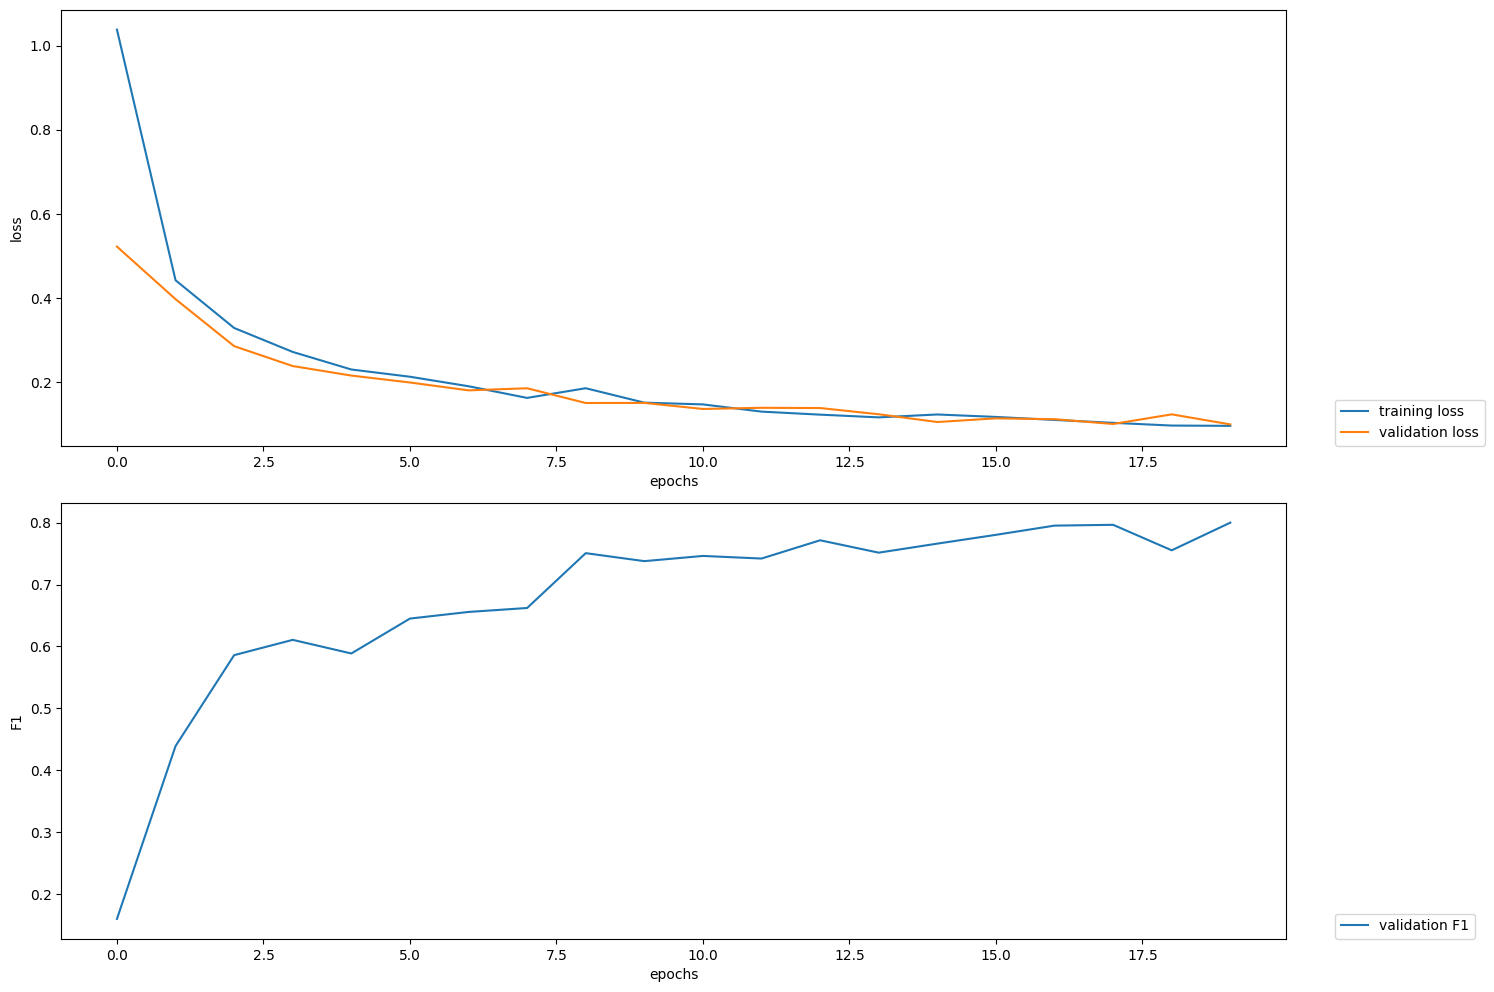

2023-09-20 12:24:56,968 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/weights.png


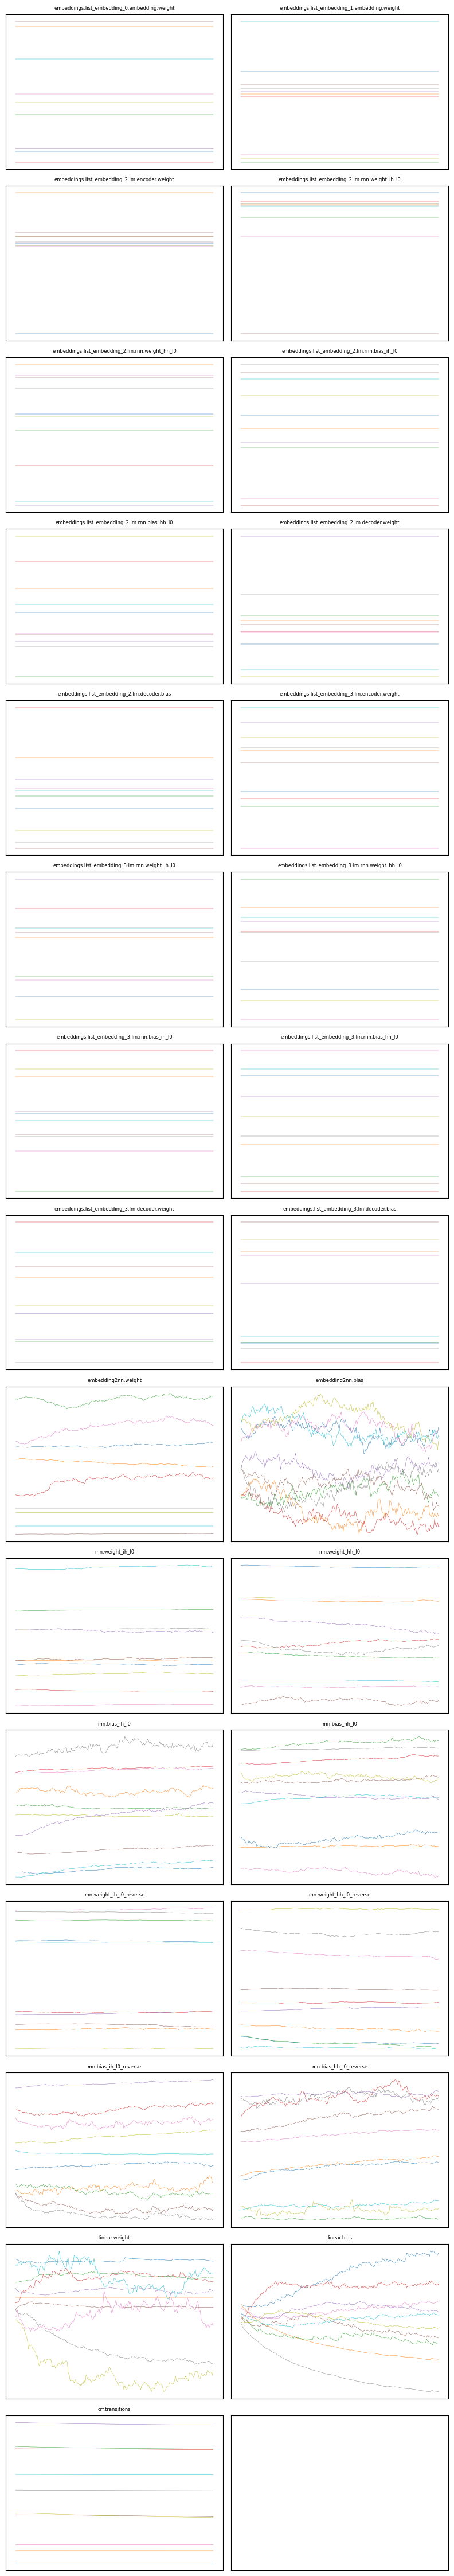

In [11]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')